#**AHAMED YUNUS**
**Iris flower classification**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


plt.style.use('fivethirtyeight')
%matplotlib inline

In [2]:
data = pd.read_csv('/content/Iris.csv')

In [3]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data.describe

<bound method NDFrame.describe of       Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-se

In [5]:
data.info

<bound method DataFrame.info of       Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-seto

In [6]:
data.shape

(150, 6)

we should drop id column b'coz it's not requuired.

In [7]:
data.drop('Id',axis=1,inplace=True)

In [8]:
data.head(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [9]:
data['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [10]:
data.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

<Axes: >

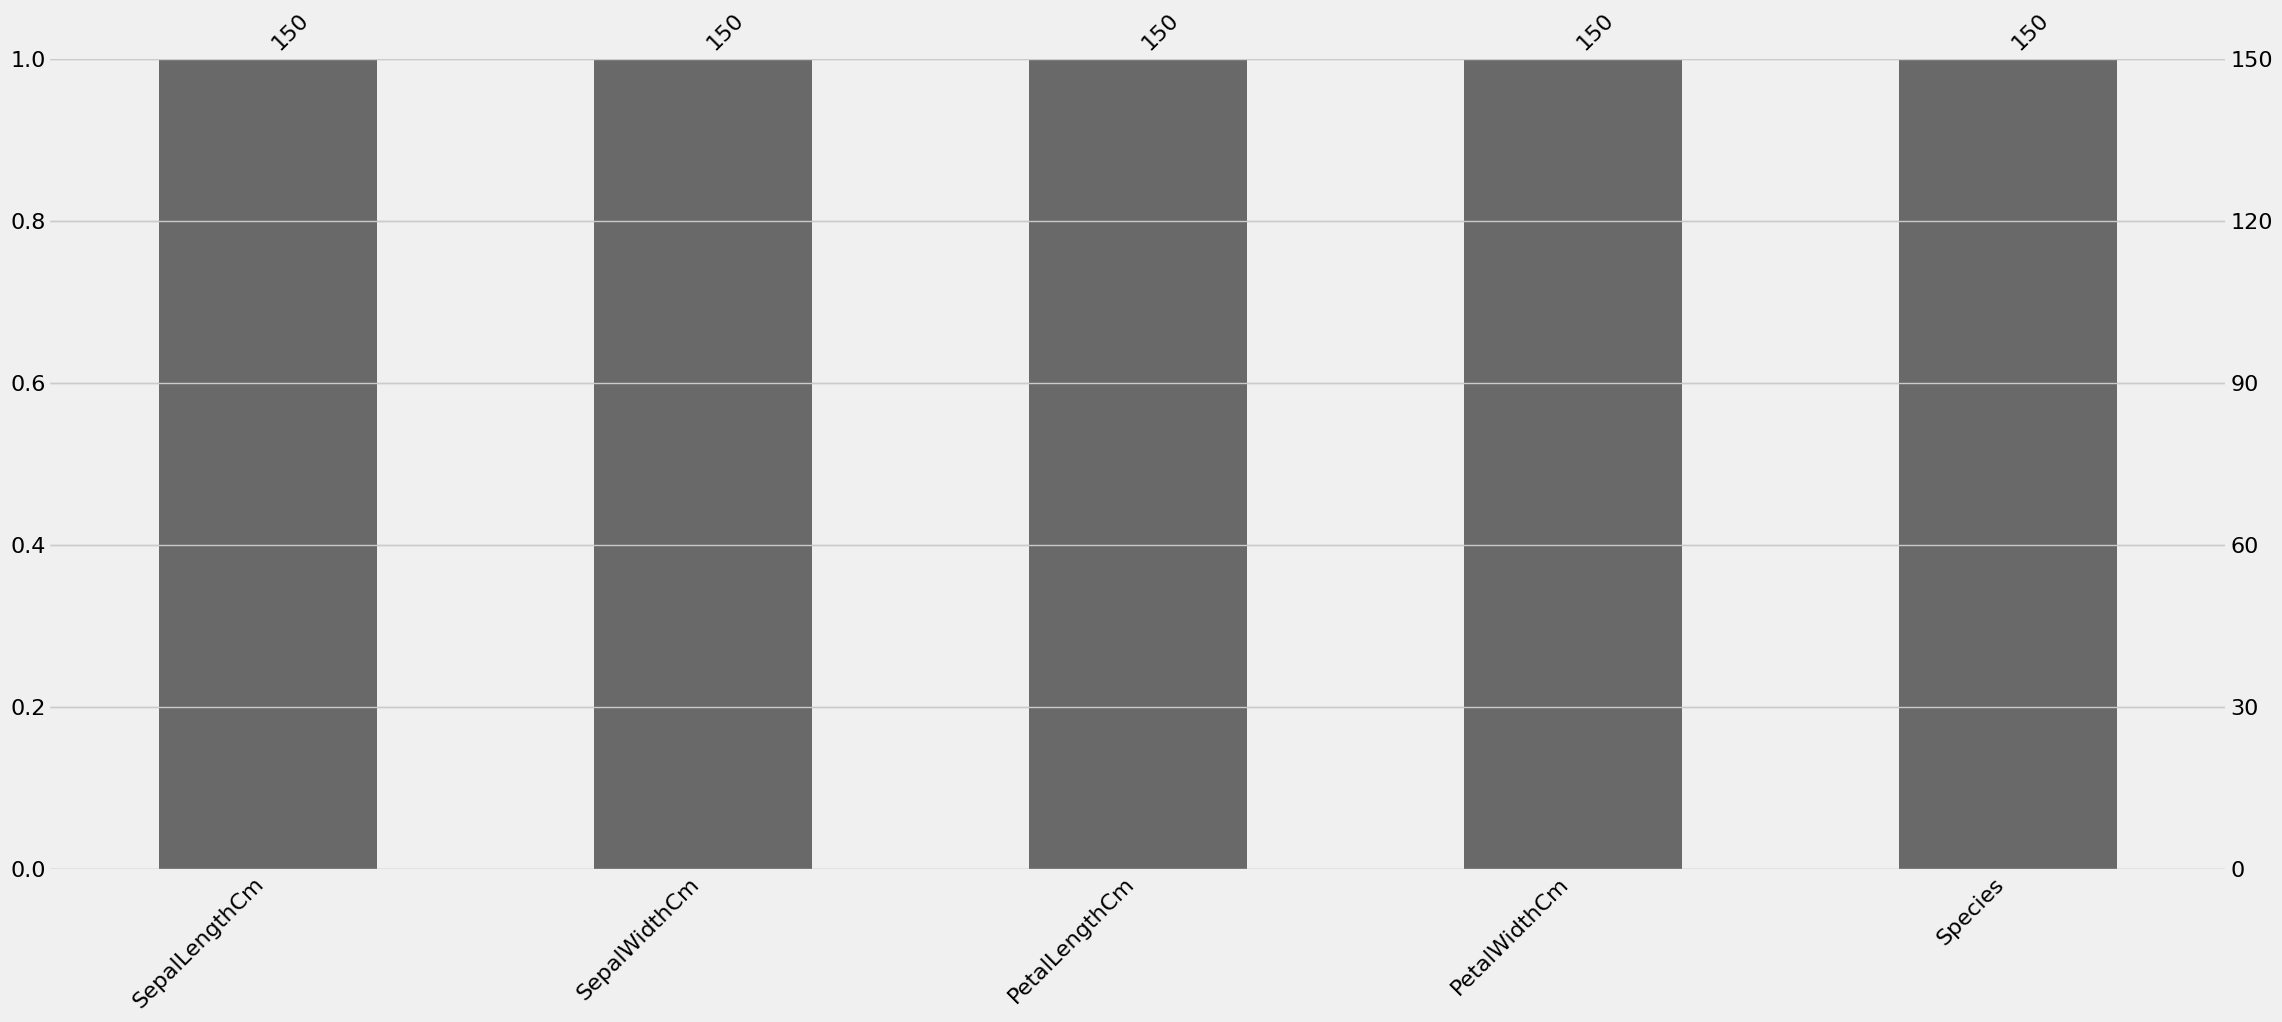

In [11]:
import missingno as msno
msno.bar(data)

In [27]:
data.drop_duplicates(inplace=True)

#**EDA**

**1. Relationship between species and sepal length.**

<Axes: xlabel='Species', ylabel='SepalLengthCm'>

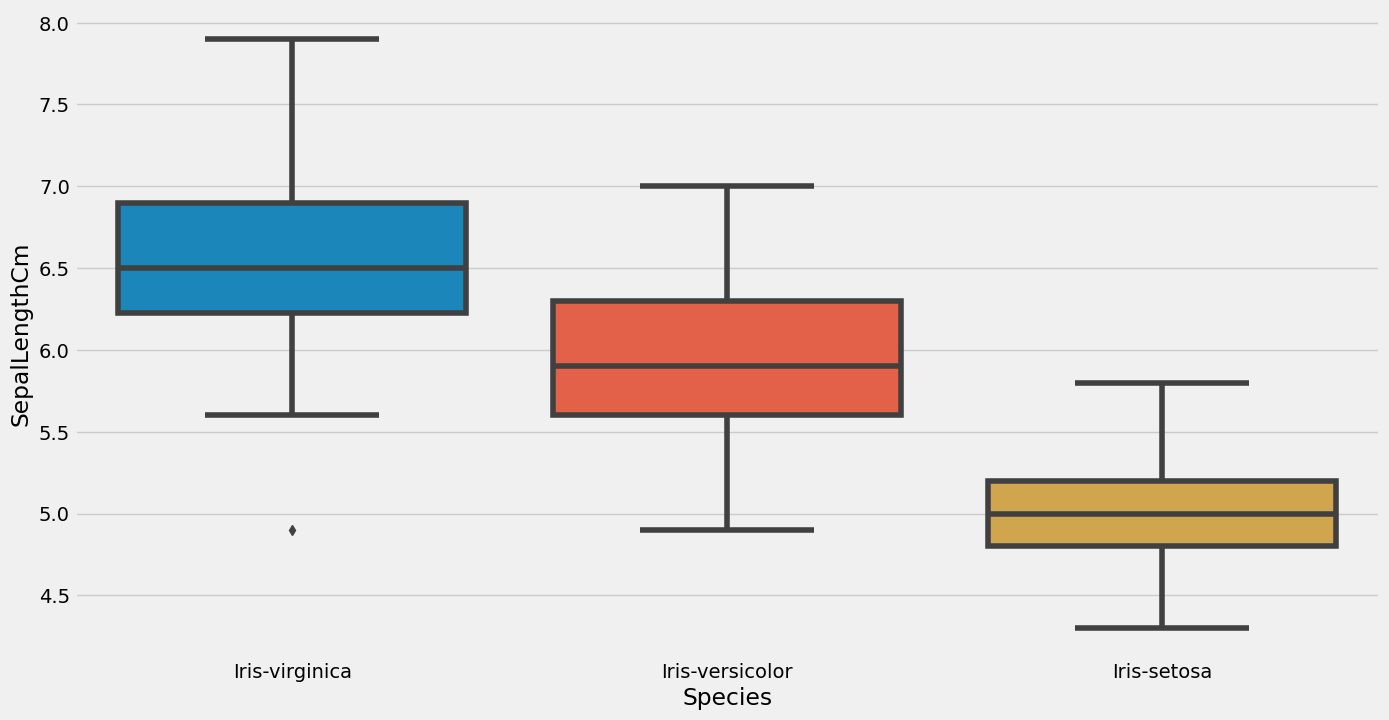

In [12]:
plt.figure(figsize=(15,8))
sns.boxplot(x='Species',y='SepalLengthCm',data=data.sort_values('SepalLengthCm',ascending=False))

**2.Relationship between species and sepal width.**

<Axes: xlabel='SepalWidthCm', ylabel='SepalLengthCm'>

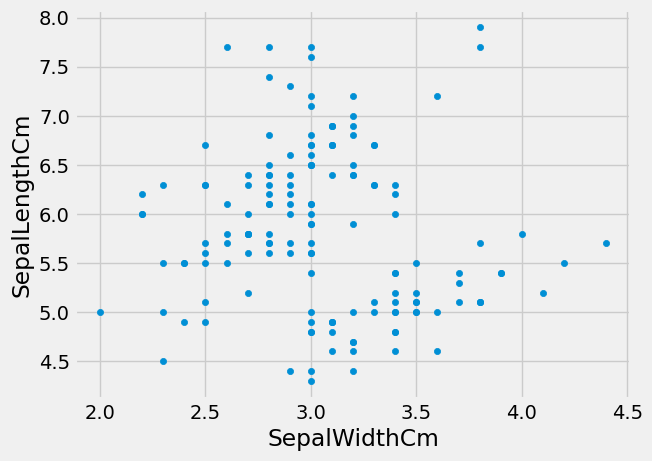

In [13]:
data.plot(kind='scatter',x='SepalWidthCm',y='SepalLengthCm')

**3. Relationship between sepal width and sepal length**

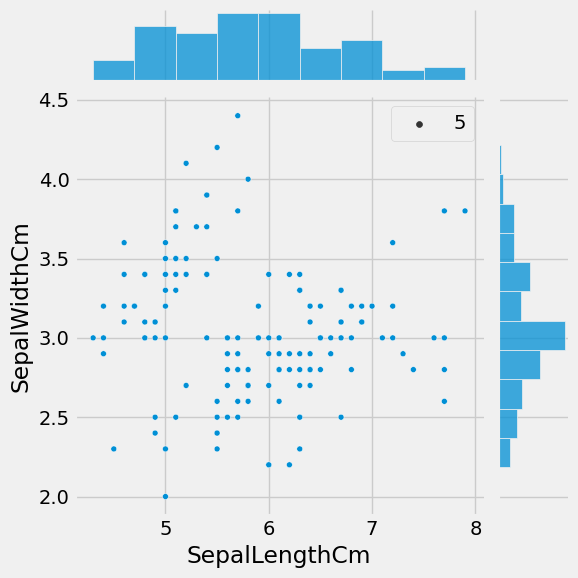

In [14]:
sns.jointplot(x="SepalLengthCm", y="SepalWidthCm", data=data, size=5)

**4.Pairplot**

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


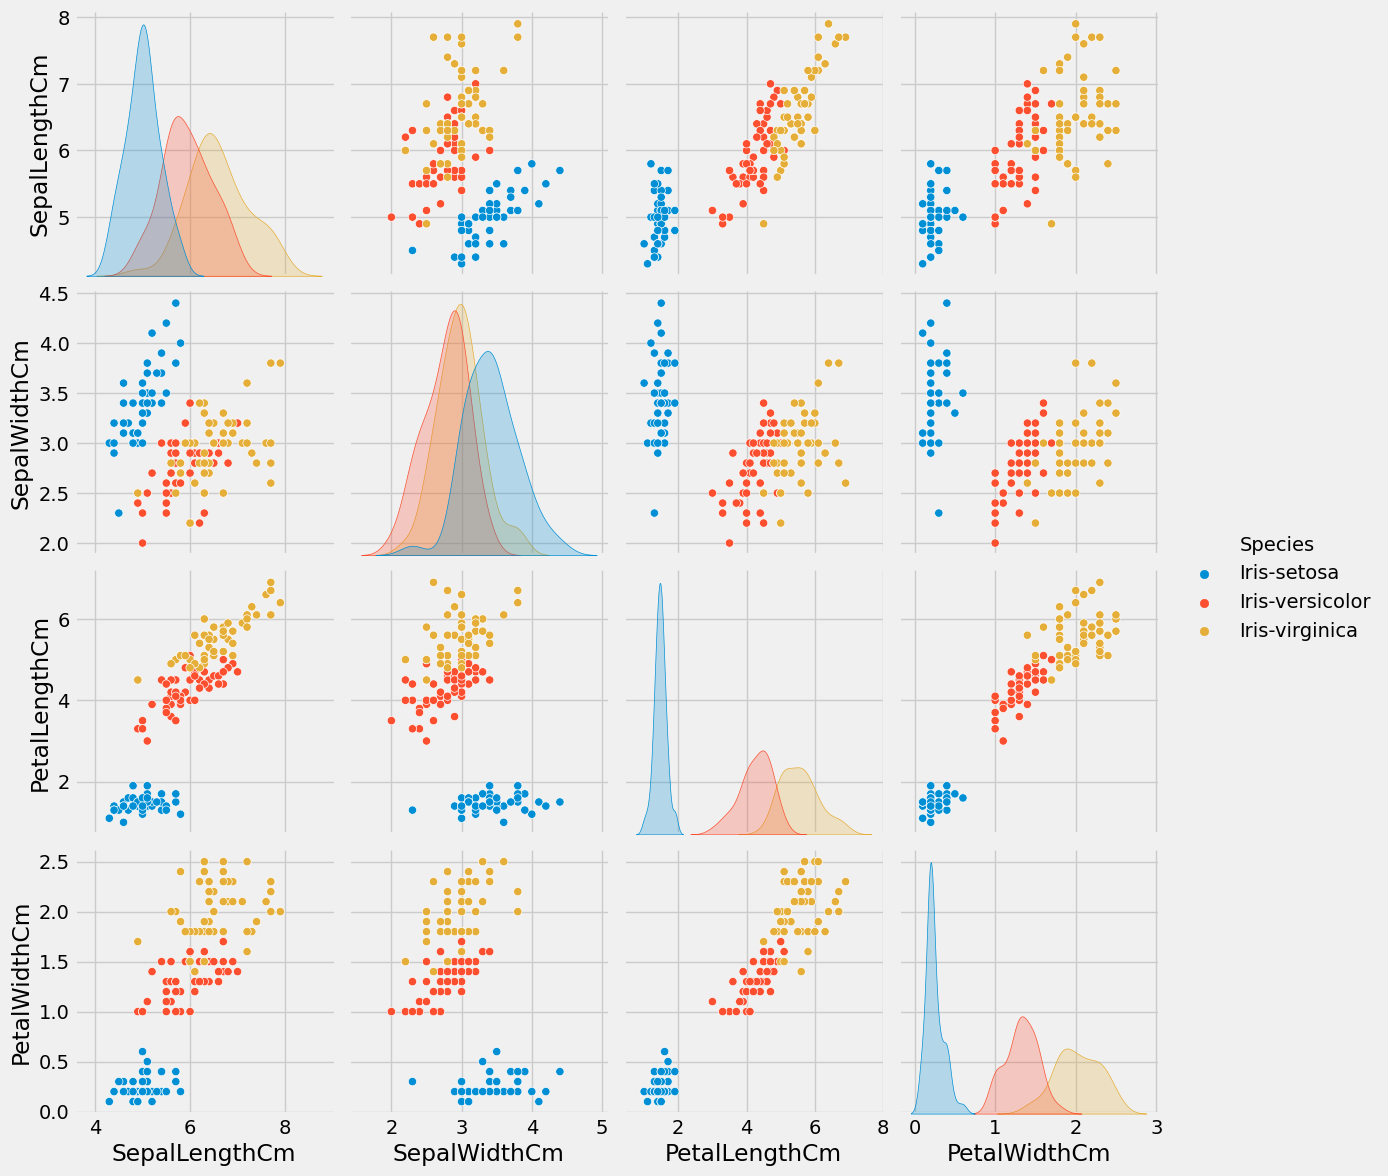

In [15]:
sns.pairplot(data, hue="Species", size = 3)

**5.Boxplot.**

array([[<Axes: title={'center': 'PetalLengthCm'}, xlabel='[Species]'>,
        <Axes: title={'center': 'PetalWidthCm'}, xlabel='[Species]'>],
       [<Axes: title={'center': 'SepalLengthCm'}, xlabel='[Species]'>,
        <Axes: title={'center': 'SepalWidthCm'}, xlabel='[Species]'>]],
      dtype=object)

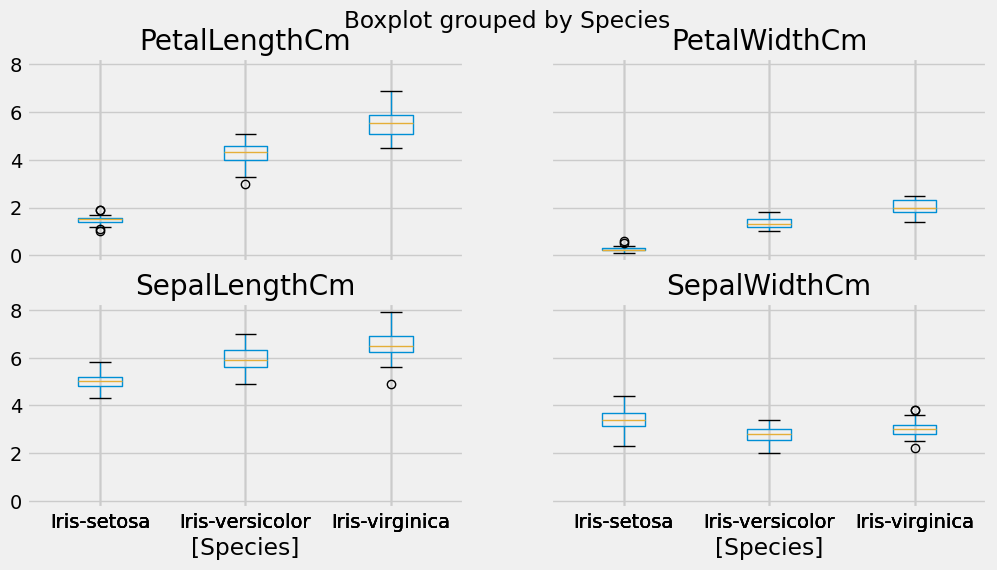

In [16]:
data.boxplot(by="Species", figsize=(12, 6))

**6. Andrew curves**

<Axes: >

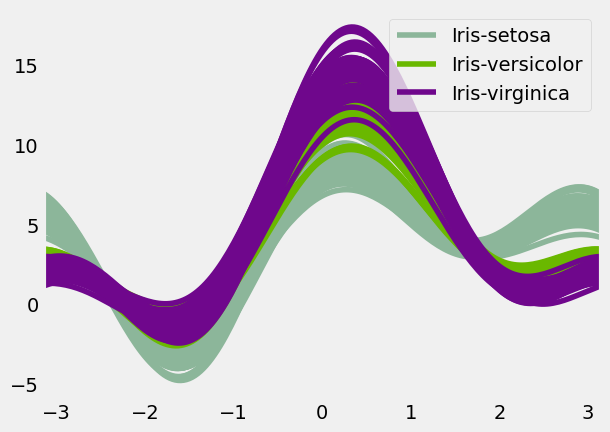

In [17]:
import pandas.plotting
from pandas.plotting import andrews_curves
andrews_curves(data, "Species")

**7. Categorical plot.**

<Figure size 1500x1500 with 0 Axes>

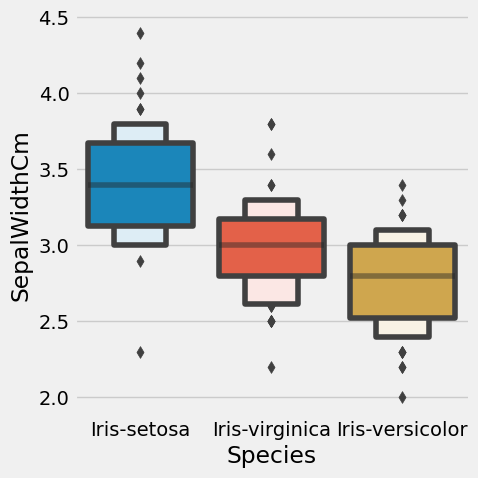

In [18]:
plt.figure(figsize=(15,15))
sns.catplot(x='Species',y='SepalWidthCm',data=data.sort_values('SepalWidthCm',ascending=False),kind='boxen')

#**Building Neural Networks**

In [19]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

In [20]:
data['Species'] = pd.Categorical(data.Species)
data['Species'] = data.Species.cat.codes
y = to_categorical(data.Species)
x = to_categorical(data.SepalLengthCm)

In [21]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.30,stratify=y,random_state=123)

In [27]:
model=Sequential()
model.add(Dense(100,activation='relu',input_shape=(8,)))

model.add(Dense(3,activation='softmax'))

In [28]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [29]:
history=model.fit(X_train,y_train,epochs=10,validation_data=(X_test, y_test))

Epoch 1/10
4/4 [==============================] - 5s 65ms/step - loss: 1.1119 - accuracy: 0.3238 - val_loss: 1.0935 - val_accuracy: 0.3556
Epoch 2/10
4/4 [==============================] - 0s 17ms/step - loss: 1.0925 - accuracy: 0.3619 - val_loss: 1.0804 - val_accuracy: 0.4444
Epoch 3/10
4/4 [==============================] - 0s 17ms/step - loss: 1.0756 - accuracy: 0.4667 - val_loss: 1.0672 - val_accuracy: 0.4444
Epoch 4/10
4/4 [==============================] - 0s 12ms/step - loss: 1.0590 - accuracy: 0.4667 - val_loss: 1.0541 - val_accuracy: 0.4889
Epoch 5/10
4/4 [==============================] - 0s 12ms/step - loss: 1.0435 - accuracy: 0.6286 - val_loss: 1.0411 - val_accuracy: 0.4889
Epoch 6/10
4/4 [==============================] - 0s 18ms/step - loss: 1.0272 - accuracy: 0.6286 - val_loss: 1.0293 - val_accuracy: 0.4889
Epoch 7/10
4/4 [==============================] - 0s 14ms/step - loss: 1.0133 - accuracy: 0.6286 - val_loss: 1.0179 - val_accuracy: 0.4889
Epoch 8/10
4/4 [===========

In [30]:
model.evaluate(X_test,y_test)

2/2 [==============================] - 0s 9ms/step - loss: 0.9833 - accuracy: 0.4889


[0.9832871556282043, 0.4888888895511627]

In [31]:
pred = model.predict(X_test[:10])
print(pred)

1/1 [==============================] - 0s 99ms/step
[[0.22966819 0.33571482 0.43461704]
 [0.34173584 0.39844286 0.2598213 ]
 [0.34173584 0.39844286 0.2598213 ]
 [0.22966819 0.33571482 0.43461704]
 [0.34173584 0.39844286 0.2598213 ]
 [0.2990694  0.27672538 0.4242052 ]
 [0.22966819 0.33571482 0.43461704]
 [0.22966819 0.33571482 0.43461704]
 [0.2990694  0.27672538 0.4242052 ]
 [0.22966819 0.33571482 0.43461704]]


In [32]:
p=np.argmax(pred,axis=1)
print(p)
print(y_test[:10])

[2 1 1 2 1 2 2 2 2 2]
[[0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]]


In [33]:
history.history['accuracy']

[0.32380953431129456,
 0.3619047701358795,
 0.46666666865348816,
 0.46666666865348816,
 0.6285714507102966,
 0.6285714507102966,
 0.6285714507102966,
 0.6285714507102966,
 0.6285714507102966,
 0.6285714507102966]

In [34]:
history.history['val_accuracy']

[0.35555556416511536,
 0.4444444477558136,
 0.4444444477558136,
 0.4888888895511627,
 0.4888888895511627,
 0.4888888895511627,
 0.4888888895511627,
 0.4888888895511627,
 0.4888888895511627,
 0.4888888895511627]

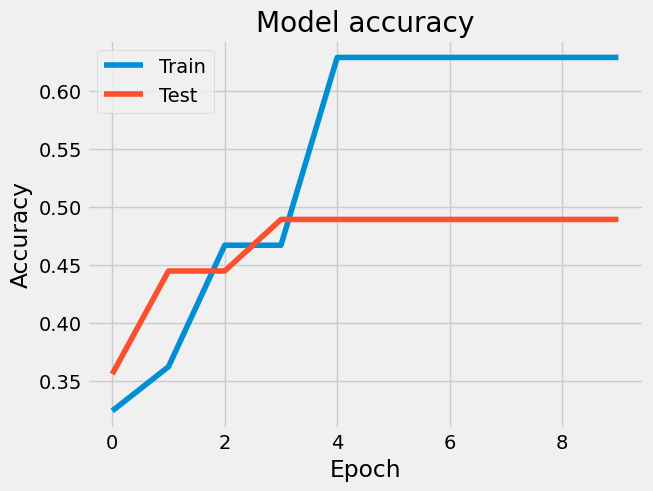

In [35]:
plt.figure()


plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])
plt.show()